<a href="https://colab.research.google.com/github/RHP043/C119/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load=files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd

#column names
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
df=pd.read_csv("diabetes.csv",names=col_names).iloc[1:]
print(df.head())

  pregnant glucose  bp skin insulin   bmi pedigree age label
1        6     148  72   35       0  33.6    0.627  50     1
2        1      85  66   29       0  26.6    0.351  31     0
3        8     183  64    0       0  23.3    0.672  32     1
4        1      89  66   23      94  28.1    0.167  21     0
5        0     137  40   35     168  43.1    2.288  33     1


In [3]:
features=['pregnant','insulin','bmi','age','glucose','bp','pedigree']
X = df[features]
y=df.label

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#splitting data in trainng and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

#initializing the decision tree model
clf=DecisionTreeClassifier()
#fitting the data into the model
clf=clf.fit(X_train,y_train)

#calculating the accuracy of the model
y_pred=clf.predict(X_test)
print("accuracy: ",metrics.accuracy_score(y_test,y_pred))

accuracy:  0.696969696969697


In [5]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

#we will store the data from our classifier tree as text
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['0','1'])
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<glucose &le; 129.5<br/>gini = 0.449<br/>samples = 537<br/>value = [354, 183]<br/>class = 0>, fillcolor="#f2c29f"] ;
1 [label=<bmi &le; 26.3<br/>gini = 0.329<br/>samples = 357<br/>value = [283, 74]<br/>class = 0>, fillcolor="#eca26d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<bmi &le; 9.1<br/>gini = 0.06<br/>samples = 97<br/>value = [94, 3]<br/>class = 0>, fillcolor="#e6853f"] ;
1 -> 2 ;
3 [label=<glucose &le; 114.5<br/>gini = 0.444<br/>samples = 6<br/>value = [4, 2]<br/>class = 0>, fillcolor="#f2c09c"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [4, 0]<br/>class = 0>, fillcolor="#e58139"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 5 ;
6 [label=<pedigree &le; 0.669<br/>gini = 0.022<br/>samples = 91<br/>value = [90, 1]<br/>class = 0>, fillcolor

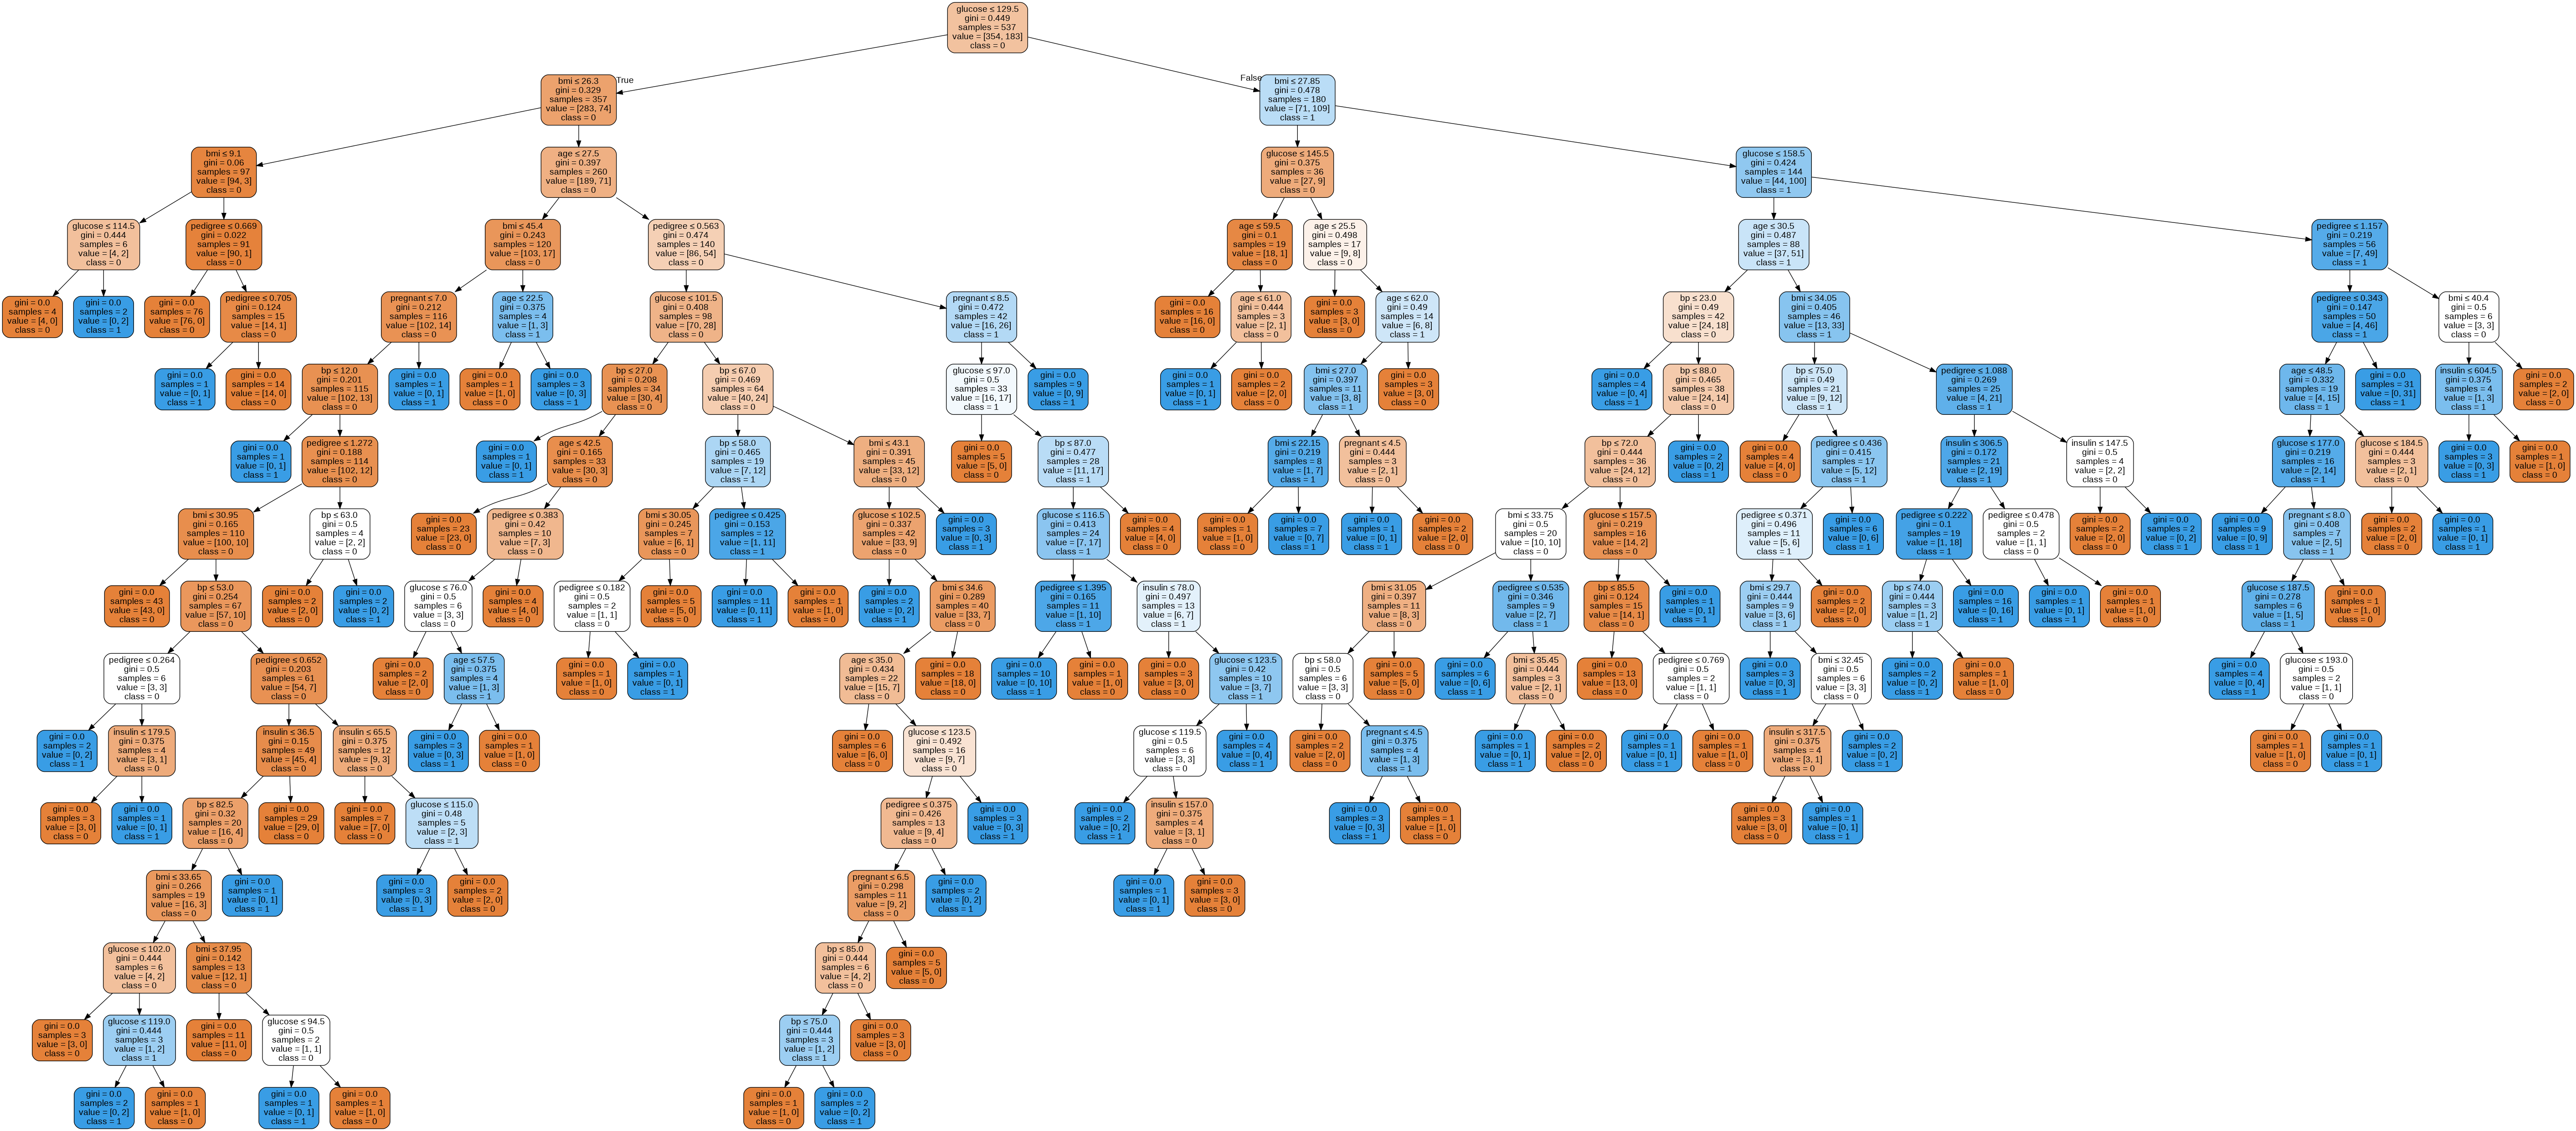

In [6]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [7]:
clf=DecisionTreeClassifier(max_depth=3)
clf=clf.fit(X_train,y_train)

#calculating the accuracy of the model
y_pred=clf.predict(X_test)
print("accuracy: ",metrics.accuracy_score(y_test,y_pred))

accuracy:  0.7575757575757576


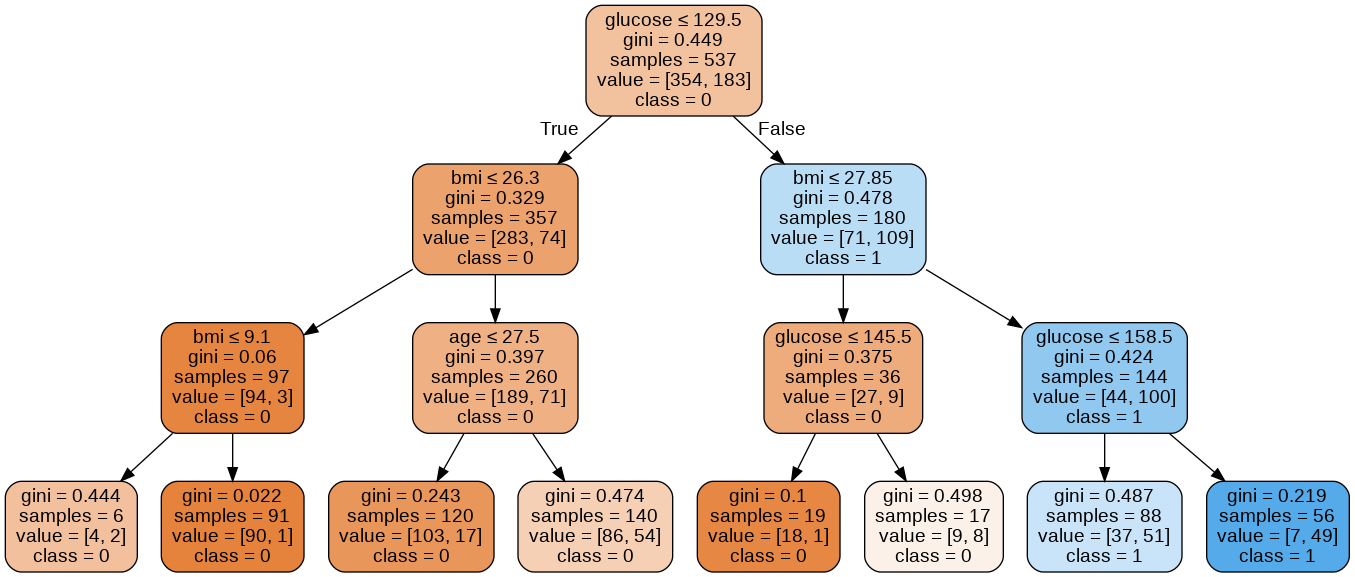

In [8]:
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Conclusion:by looking at this chart, we can say that with almost 75% accuracy that a person who's
glucose>129.5 and bmi >27.85 is more prone to be a diabetic patient